IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset  = pd.read_csv('/content/drive/MyDrive/sales.csv')

In [ ]:
dataset.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


DATA PREPROCESSING

In [ ]:
dataset = dataset.fillna(dataset.mean())

<ipython-input-5-cb698cd9323f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset = dataset.fillna(dataset.mean())


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [ ]:
dataset = pd.get_dummies(dataset)

In [ ]:
dataset

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,0,1,0
4570,71.0,17.534640,1.940873,253.610411,1,0,0,0


In [ ]:
dataset = dataset[['TV', 'Radio', 'Social Media', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Sales']]

In [ ]:
x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1:].values

SOME SIMPLE VISUALIZATIONS TO HAVE AN IDEA OF RELATIONSHIPS OF THE COLUMNS

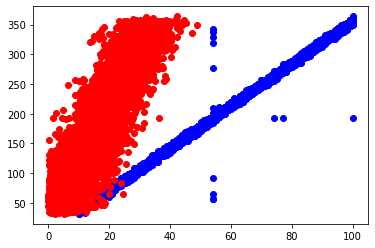

In [ ]:
plt.scatter(dataset["TV"],y,color = 'blue')
plt.scatter(dataset["Radio"],y,color = 'red')

In [ ]:
print(x)
print(y)

[[16.          6.56623079  2.90798277 ...  1.          0.
   0.        ]
 [13.          9.23776457  2.4095672  ...  1.          0.
   0.        ]
 [41.         15.88644602  2.91341018 ...  1.          0.
   0.        ]
 ...
 [44.         19.80007236  5.09619187 ...  0.          1.
   0.        ]
 [71.         17.5346403   1.94087322 ...  0.          0.
   0.        ]
 [42.         15.96668752  5.04654763 ...  0.          1.
   0.        ]]
[[ 54.73275715]
 [ 46.67789698]
 [150.1778288 ]
 ...
 [163.6314574 ]
 [253.6104113 ]
 [148.2024141 ]]


DIVIDING THE DATASET INTO TRAINING AND TESTING SPLITS

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

REGRESSION MODELS

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred1 = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test, y_pred1))

0.9948769000112848


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

<ipython-input-21-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
y_pred2 = rf.predict(x_test)

In [ ]:
print(r2_score(y_test, y_pred2))

0.994079966525939


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dr = DecisionTreeRegressor()

In [ ]:
dr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred3 = dr.predict(x_test)

In [ ]:
print(r2_score(y_test,y_pred3))

0.9919905128170694
